In [1]:
# Local paths
dir_pfx = './'
data_dir = dir_pfx + '../../data/Vehicules1024/'
# Add the local_modules directory to the set of paths
# Python uses to look for imports.
import sys
sys.path.append(dir_pfx)
sys.path.append('../')

In [2]:
#!pip3 install -q git+https://www.github.com/keras-team/keras-contrib.git
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from importlib import reload
import utils
import DenseSRGAN


Using TensorFlow backend.


In [3]:
num_images = 50
files = utils.scan_dataset(data_dir, num_images) #TODO: 50
training_set, testing_set = utils.create_subsets(files, data_dir, use_validation=False)
im_hr, im_lr, batch_idx = utils.load_data(0, training_set, data_dir, True, len(training_set))


The following image is missing!: 00000005
The following image is missing!: 00000023
Using 48 images.
Saving files to ./../../data/Vehicules1024/


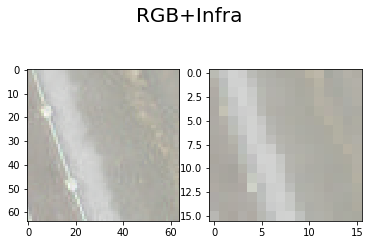

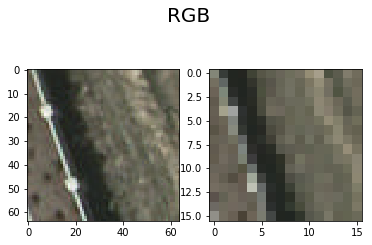

In [4]:
ix = 2560
normalized_around_zero = False

if normalized_around_zero:
    plt.figure().suptitle('RGB+Infra', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(utils.un_normalize(im_hr[ix,:,:,:]))
    plt.subplot(1,2,2)
    plt.imshow(utils.un_normalize(im_lr[ix,:,:,:]))

    plt.figure().suptitle('RGB', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(utils.un_normalize(im_hr[ix,:,:,0:3]))
    plt.subplot(1,2,2)
    plt.imshow(utils.un_normalize(im_lr[ix,:,:,0:3]))
else:
    plt.figure().suptitle('RGB+Infra', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(im_hr[ix,:,:,:])
    plt.subplot(1,2,2)
    plt.imshow(im_lr[ix,:,:,:])

    plt.figure().suptitle('RGB', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(im_hr[ix,:,:,0:3])
    plt.subplot(1,2,2)
    plt.imshow(im_lr[ix,:,:,0:3])

In [5]:
gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,proj_pfx="OH",gpu_list=[1,3,5,7],dropout_rate=0.3,num_epochs_trained=450,weights_path='./weights/OH/')
gan.train(epochs=1000,verbose=False,bench_idx=2560,batch_size=16,save_interval=10,view_interval=2)

In [ ]:
ix = 10
ix2 = 11

img = gan.gen.predict(im_lr[ix:ix+1,:,:,:]).squeeze()
img = (img + 1)/2
plt.figure().suptitle('RGB+Infra', fontsize=20)
plt.subplot(1,2,1)
plt.imshow(im_hr[ix,:,:,:])
plt.subplot(1,2,2)
plt.imshow(img)

img = gan.gen.predict(im_lr[ix2:ix2+1,:,:,:]).squeeze()
img = (img + 1)/2
plt.figure().suptitle('RGB+Infra', fontsize=20)
plt.subplot(1,2,1)
plt.imshow(im_hr[ix2,:,:,:])
plt.subplot(1,2,2)
plt.imshow(img)

In [ ]:
floss = []
tloss = []

for i in np.random.randint(low=0,high=len(im_lr),size=(500)):
  tloss.append(gan.disc.predict(im_hr[i:i+1,:,:,:]).squeeze())
  floss.append(gan.disc.predict(gan.gen.predict(im_lr[i:i+1,:,:,:])).squeeze())

  
print('Mean Loss Real Images: {0}'.format(np.mean(tloss)))
print('Mean Loss False Images: {0}'.format(np.mean(floss)))


plt.figure()
plt.plot(list(range(len(tloss))),tloss)
plt.plot(list(range(len(floss))),floss)
plt.legend(['Loss Real Images','Loss Generated Images'])
plt.xlabel('Random Sample Number')
plt.ylabel('Cross Entropy Loss')
plt.show